# Pymaceuticals Inc. (Module 5 Assignment)
---
## Glen Dagger

### Analysis

- For the Summary Statistics section, I grouped cleaned_df by "Drug Regimen" and used that grouped dataframe to create series for mean, median, variance, standard deviation, and SEM of the tumor volume. After examining the summary table, I noted that Capomulin and Ramicane have the lowest mean/median tumor volume by at least 10 mm3 (and also the lowest variance). I confirmed that they all had the same starting tumor volume (45 mm3) which suggests that these two drug regimens were the most effective. In fact, they were the only two drug regimens with an average decrease in tumor size.

- Ketapril had the highest mean/median tumor volume as well as the greatest variance, which indicates that this drug might be too ineffective and inconsistent in this setting to be recommended. 

- In the scatter plot of Average Tumor Volume vs. Weight, I observed a strong positive correlation (r-value of just over 0.84) between the two measurements. This seems like a fairly common sense observation, but it shows that larger mice tend to have larger tumors on average.

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [87]:
# Checking the number of mice.
total_mouse_count = len(combined_df["Mouse ID"].value_counts())
total_mouse_count

249

In [88]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_df[combined_df.duplicated(subset=["Mouse ID", "Timepoint"])]

mouse_duplicate = duplicate_mice["Mouse ID"].iloc[0]

mouse_duplicate

'g989'

In [89]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_duplicate_df = combined_df[combined_df['Mouse ID'] == mouse_duplicate]

mouse_duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [90]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df = combined_df[combined_df['Mouse ID'] != mouse_duplicate]

cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [91]:
# Checking the number of mice in the clean DataFrame.
total_mouse_count = len(cleaned_df["Mouse ID"].value_counts())
total_mouse_count

248

## Summary Statistics

In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drugregimen_group = cleaned_df.groupby("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor_vol = drugregimen_group["Tumor Volume (mm3)"].mean()
median_tumor_vol = drugregimen_group["Tumor Volume (mm3)"].median()
var_tumor_vol = drugregimen_group["Tumor Volume (mm3)"].var()
std_tumor_vol = drugregimen_group["Tumor Volume (mm3)"].std()
sem_tumor_vol = drugregimen_group["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.

tumorvolume_by_regimen = pd.DataFrame({"Mean Tumor Volume":mean_tumor_vol, "Median Tumor Volume":median_tumor_vol, "Tumor Volume Variance":var_tumor_vol,
                                        "Tumor Volume Std. Dev.":std_tumor_vol, "Tumor Volume Std. Err.":sem_tumor_vol})

tumorvolume_by_regimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

tumorvolume_by_regimen_summary2 = cleaned_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

tumorvolume_by_regimen_summary2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

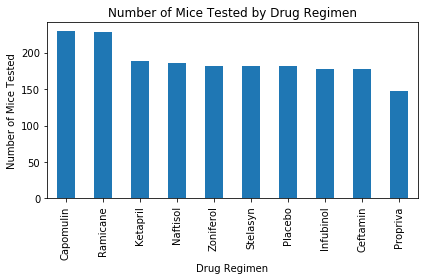

In [192]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Create dataframe by grouping cleaned_df by Drug Regimen and counting # of Timepoints for each, then sorting values from greatest to least
regimen_by_timepoint = cleaned_df.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)

regimen_by_timepoint.plot(kind="bar")

plt.title("Number of Mice Tested by Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.tight_layout()
plt.show()

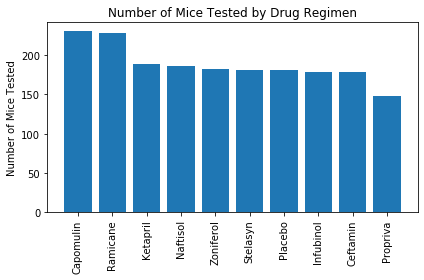

In [189]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

regimen_by_timepoint = drugregimen_group["Timepoint"].count().sort_values(ascending=False)
regimen_by_timepoint
plt.bar(regimen_by_timepoint.index, regimen_by_timepoint)

plt.title("Number of Mice Tested by Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

Sex
Male      958
Female    922
Name: Mouse ID, dtype: int64


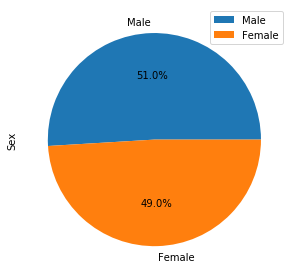

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mousecount_by_sex = cleaned_df.groupby("Sex").count()["Mouse ID"].sort_values(ascending=False)
print(mousecount_by_sex)

mousecount_by_sex.plot(kind="pie", autopct='%.1f%%')

plt.ylabel("Sex")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

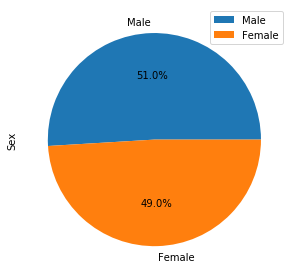

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mousecount_by_sex = cleaned_df.groupby("Sex").count()["Mouse ID"].sort_values(ascending=False)

plt.pie(mousecount_by_sex, labels=mousecount_by_sex.index, autopct='%.1f%%')

plt.ylabel("Sex")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [98]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_df.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoint, cleaned_df, on=["Mouse ID", "Timepoint"], how='left').sort_values("Mouse ID").rename(columns={"Timepoint":"Max Timepoint", "Tumor Volume (mm3)":"Final Tumor Vol (mm3)"})


final_tumor_volume

,Mouse ID,Max Timepoint,Final Tumor Vol (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [99]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# For loop to iterate through each drug treatment in the list above
for drug in treatments:
      
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = final_tumor_volume[final_tumor_volume["Drug Regimen"] == drug]
    
    # add subset 
    tumor_volumes.append(drug_df["Final Tumor Vol (mm3)"])
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_df["Final Tumor Vol (mm3)"].quantile([0.25,0.5,0.75])

    
    drug_mean = drug_df["Final Tumor Vol (mm3)"].mean()
    drug_q1 = quartiles[0.25]
    drug_q3 = quartiles[0.75]
    drug_iqr = drug_q3 - drug_q1
    upper_bound = drug_q3 + (1.5 * drug_iqr)
    lower_bound = drug_q1 - (1.5 * drug_iqr)
    print(f"IQR for {drug}: {drug_iqr}")
    print(f"Lower bound for {drug}: {lower_bound}")
    print(f"Upper bound for {drug}: {upper_bound}")
    
    outliers = drug_df.loc[(drug_df["Final Tumor Vol (mm3)"] > upper_bound) | (drug_df["Final Tumor Vol (mm3)"] < lower_bound)]
    print(f"Number of {drug} Outliers: {len(outliers)}\n")
    
    

IQR for Capomulin: 7.781863460000004
Lower bound for Capomulin: 20.70456164999999
Upper bound for Capomulin: 51.83201549
Number of Capomulin Outliers: 0

IQR for Ramicane: 9.098536719999998
Lower bound for Ramicane: 17.912664470000003
Upper bound for Ramicane: 54.30681135
Number of Ramicane Outliers: 0

IQR for Infubinol: 11.477135160000003
Lower bound for Infubinol: 36.83290494999999
Upper bound for Infubinol: 82.74144559000001
Number of Infubinol Outliers: 1

IQR for Ceftamin: 15.577752179999997
Lower bound for Ceftamin: 25.355449580000002
Upper bound for Ceftamin: 87.66645829999999
Number of Ceftamin Outliers: 0



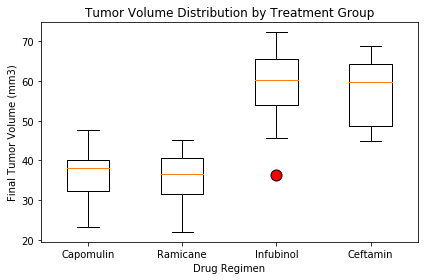

In [100]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

flierprops = {"marker":'o', "markerfacecolor":"red", "markersize":11, "markeredgecolor":"black"}

plt.boxplot(tumor_volumes, flierprops=flierprops)
plt.xticks([1,2,3,4],treatments)

plt.title("Tumor Volume Distribution by Treatment Group")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

plt.tight_layout()
plt.show()

## Line and Scatter Plots

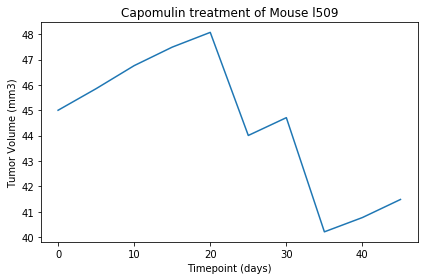

In [111]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse_id = "l509"

mouse_id_df = cleaned_df.loc[cleaned_df["Mouse ID"] == capomulin_mouse_id]

mouse_id_df.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", legend=False)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of Mouse {capomulin_mouse_id}")

plt.tight_layout()
plt.show()

In [107]:
final_tumor_volume

,Mouse ID,Max Timepoint,Final Tumor Vol (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


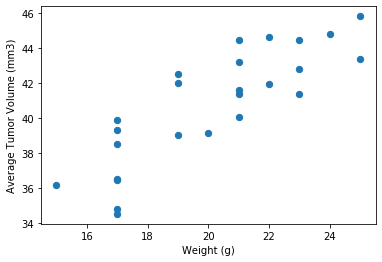

In [104]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == 'Capomulin']

avg_tumor_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
mouse_ids = capomulin_df.groupby("Mouse ID")["Weight (g)"].count()

volume_by_weight_df = pd.DataFrame({"Average Tumor Volume (mm3)":avg_tumor_volume, "Weight (g)":mouse_weight})

volume_by_weight_df.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", s=40)



## Correlation and Regression

The r value is: 0.841936342469472


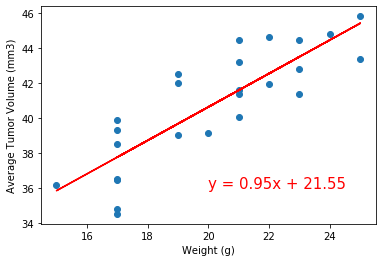

In [172]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
y_values = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r value is: {rvalue}")
plt.show()